AttributeError: 'AxesSubplot' object has no attribute 'plot_surface'

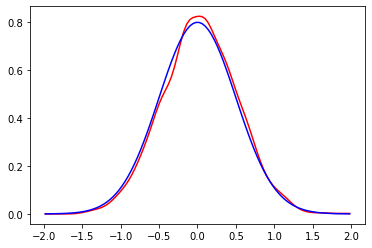

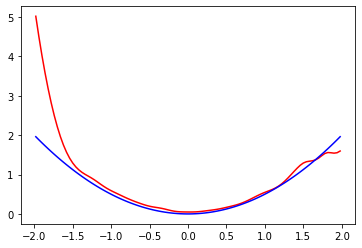

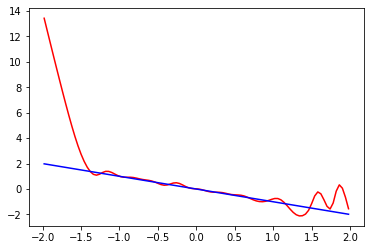

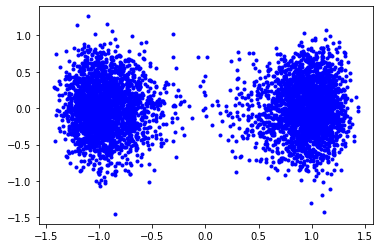

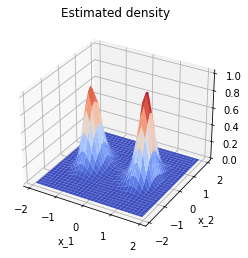

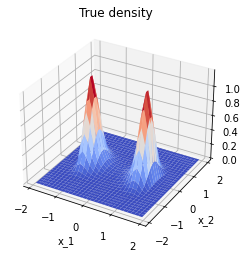

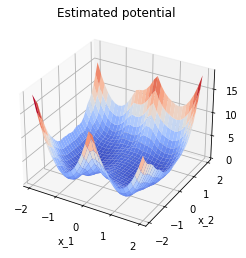

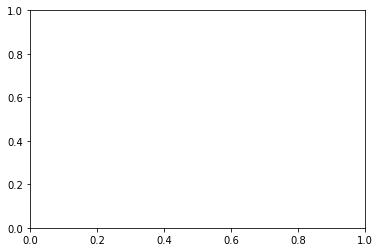

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt

from addPath import *
addPath()

from d3s import algorithms
from d3s import domain
from d3s import kernels
from d3s import systems

#%% Ornstein-Uhlenbeck process --------------------------------------------------------------------

#%% define domain
bounds = np.array([[-2, 2]])
boxes = np.array([100])
Omega = domain.discretization(bounds, boxes)

#%% define system
alpha = 1
beta = 4

f = systems.OrnsteinUhlenbeck(1e-3, 1000)

#%% generate data
m  = 2000
X = f.getTrajectory(np.zeros((1, 1)), m)

#%% kernel density estimation
k = kernels.gaussianKernel(0.1)
kde = kernels.densityEstimate(X, k, beta)

c = Omega.midpointGrid()
n = Omega.numBoxes()

rho = kde.rho(c)
Vk = kde.V(c)
gradVk = kde.gradV(c)

#%% plot results
V = 1/2*alpha*c**2 # true potential
mu = np.sqrt(2/np.pi)*np.exp(-beta*V) # true invariant density

plt.figure()
plt.plot(c.flatten(), rho.flatten(), 'r')
plt.plot(c.flatten(), mu.flatten(), 'b')

plt.figure()
plt.plot(c.flatten(), Vk.flatten(), 'r')
plt.plot(c.flatten(), V.flatten(), 'b')

plt.figure()
plt.plot(c.flatten(), -gradVk.flatten(), 'r')
plt.plot(c.flatten(), -alpha*c.flatten(), 'b')


#%% Double-well potential -------------------------------------------------------------------------

#%% define domain
bounds = np.array([[-2, 2], [-2, 2]])
boxes = np.array([30, 30])
Omega = domain.discretization(bounds, boxes)

#%% define system
beta = 2/0.7**2

def V_pot(x):
    return (x[0, :]**2 - 1)**2 + x[1, :]**2

def b(x):
    return np.vstack(( -4*x[0, :]**3 + 4*x[0, :], -2*x[1, :] ))

def sigma(x):
    n = x.shape[1]
    y = np.zeros((2, 2, n))
    y[0, 0, :] = np.sqrt(2/beta)
    y[1, 1, :] = np.sqrt(2/beta)
    return y

#%% generate data
m = 5000
f = systems.DoubleWell2D(1e-3, 10000)
X = f.getTrajectory(np.zeros((2, 1)), m)

plt.figure()
plt.plot(X[0, :], X[1, :], 'b.')

#%% kernel density estimation
k = kernels.gaussianKernel(0.1)
kde = kernels.densityEstimate(X, k, beta)

c = Omega.midpointGrid()
n = Omega.numBoxes()

rho = kde.rho(c)
Vk = kde.V(c)
gradVk = kde.gradV(c)

#%% plot results
mu = 1/0.8218889942*np.exp(-beta*V_pot(c)) # true invariant density
Y = b(c)

plt.figure()
Omega.plot(rho, '3d')
plt.title('Estimated density')
plt.figure()
Omega.plot(mu, '3d')
plt.title('True density')

plt.figure()
Omega.plot(Vk, '3d')
plt.title('Estimated potential')
plt.figure()
plt.axis()
Omega.plot(V_pot(c), '3d')
plt.title('True potential')

plt.figure()
Omega.plot(-gradVk[0, :], '3d')
plt.figure()
Omega.plot(Y[0, :], '3d')

plt.figure()
Omega.plot(-gradVk[1, :], '3d')
plt.figure()
Omega.plot(Y[1, :], '3d')

#%% evaluate only in data
Y2 = b(X)
gradVk2 = kde.gradV(X)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(X[0, :], X[1, :], -gradVk2[0, :], cmap=plt.cm.Spectral)
ax.scatter(X[0, :], X[1, :], Y2[0, :], cmap=plt.cm.Spectral)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(X[0, :], X[1, :], -gradVk2[1, :])
ax.scatter(X[0, :], X[1, :], Y2[1, :], cmap=plt.cm.Spectral)

